**Prompt:**

Choose six recent popular movies. Ask at least five people that you know (friends, family, classmates, imaginary friends) to rate each of these movies that they have seen on a scale of 1 to 5. There should be at least one movie that not everyone has seen! Take the results (observations) and store them somewhere (like a SQL database, or a .CSV file). Load the information into a pandas dataframe. Your solution should include Python and pandas code that 
accomplishes the following:
1. Load the ratings by user information that you collected into a pandas dataframe.
2. Show the average ratings for each user and each movie.
3. Create a new pandas dataframe, with normalized ratings for each user. Again, show the average ratings for each user and each movie.
4. Provide a text-based conclusion: explain what might be advantages and disadvantages of using normalized ratings instead of the actual ratings.
5. [Extra credit] Create another new pandas dataframe, with standardized ratings for each user. Once again, show the average ratings for each user and each movie.

You may find this short article on normalization and standardization to be useful: 
http://bi-analytics.org/topic/9-standardization-vs-normalization/

Your deliverables should include your source data and a Jupyter Notebook, posted to GitHub. This is by design a very open ended assignment. A variety of reasonable approaches are acceptable. 

In [1]:
# import pandas and numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# inline graphics
%matplotlib inline

In [3]:
# read the csv
df = pd.read_csv('C:/Users/snr13/Google Drive/School/CUNY/IS 362/Assignments/Week 7/data-1616157447942.csv')

In [4]:
# view the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_name    54 non-null     object
 1   movie_name   54 non-null     object
 2   star_rating  54 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [5]:
# view the first five rows
df.head()

,user_name,movie_name,star_rating
0,sjm,Parasite,4
1,kb,Parasite,5
2,fm,Parasite,4
3,jll,Parasite,5
4,dm,Parasite,1


# 1. Load the ratings by user that you collected into the pandas DataFrame

In [6]:
# group this data by the 'user_name' column
# returns a DataFrameGroupBy object
grouped_by_user = df.groupby('user_name')
grouped_by_user

In [7]:
# retrieve the number of groups that this will create
grouped_by_user.ngroups

10

We are currently grouping by user_name. Ten groups have been formed, i.e. 10 users have rated the movies in this data set.

In [8]:
# what and where are these groups?
# .groups creates a dictionary,
# where the name of the groups are keys, and their unique DataFrame indexes are values
grouped_by_user.groups

{'ajl': [7, 16, 25, 34, 43, 53], 'am': [9, 18, 27, 36, 45], 'dl': [5, 14, 23, 32, 41, 51], 'dm': [4, 13, 22, 31, 40, 50], 'fm': [2, 11, 20, 39, 48], 'jll': [3, 12, 21, 30, 49], 'kb': [1, 10, 29, 38, 47], 'npl': [6, 15, 24, 33, 42, 52], 'sjm': [0, 19, 28, 37, 46], 'sm': [8, 17, 26, 35, 44]}

In [9]:
# a helper function to print the contents of the groups
def print_groups(groupobject):
  # loop over all groups, 
  # printing the group name and group details
  for name, group in groupobject:
    print(name)
    print(group)

In [10]:
# examine the content of the groups we created
print_groups(grouped_by_user)

ajl
   user_name                     movie_name  star_rating
7        ajl                       Parasite            5
16       ajl                           1917            3
25       ajl                 Ford v Ferrari            4
34       ajl                          Joker            4
43       ajl  Once Upon a Time in Hollywood            5
53       ajl                   The Irishman            5
am
   user_name                     movie_name  star_rating
9         am                           1917            3
18        am                 Ford v Ferrari            2
27        am                          Joker            5
36        am  Once Upon a Time in Hollywood            3
45        am                   The Irishman            3
dl
   user_name                     movie_name  star_rating
5         dl                       Parasite            3
14        dl                           1917            4
23        dl                 Ford v Ferrari            5
32        dl         

In [11]:
# get how many items are in each group
grouped_by_user.size()

user_name
ajl    6
am     5
dl     6
dm     6
fm     5
jll    5
kb     5
npl    6
sjm    5
sm     5
dtype: int64

In [12]:
# get descriptive statistics
grouped_by_user.describe()

star_rating                                               
                count      mean       std  min   25%  50%   75%  max
user_name                                                           
ajl               6.0  4.333333  0.816497  3.0  4.00  4.5  5.00  5.0
am                5.0  3.200000  1.095445  2.0  3.00  3.0  3.00  5.0
dl                6.0  4.333333  0.816497  3.0  4.00  4.5  5.00  5.0
dm                6.0  3.500000  1.974842  1.0  1.75  4.5  5.00  5.0
fm                5.0  3.400000  0.894427  2.0  3.00  4.0  4.00  4.0
jll               5.0  4.400000  0.894427  3.0  4.00  5.0  5.00  5.0
kb                5.0  4.200000  1.788854  1.0  5.00  5.0  5.00  5.0
npl               6.0  3.833333  1.169045  2.0  3.25  4.0  4.75  5.0
sjm               5.0  3.400000  1.140175  2.0  3.00  3.0  4.00  5.0
sm                5.0  2.800000  1.095445  2.0  2.00  2.0  4.00  4.0

# 2. Show the average ratings for each user and each movie

In [13]:
# show the average rating by user
avg_rating_by_user = grouped_by_user.agg(np.mean)
avg_rating_by_user

,star_rating
user_name,
ajl,4.333333
am,3.200000
dl,4.333333
dm,3.500000
fm,3.400000
jll,4.400000
kb,4.200000
npl,3.833333
sjm,3.400000


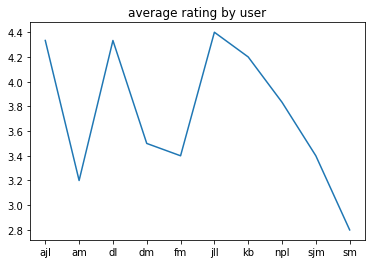

In [14]:
plt.plot(avg_rating_by_user)
plt.title('average rating by user')
plt.show()

In [15]:
# show the average rating by movie
grouped_by_movie = df.groupby('movie_name')
avg_rating_by_movie = grouped_by_movie.agg(np.mean)
avg_rating_by_movie

,star_rating
movie_name,
1917,3.555556
Ford v Ferrari,3.000000
Joker,4.666667
Once Upon a Time in Hollywood,3.333333
Parasite,3.777778
The Irishman,4.222222


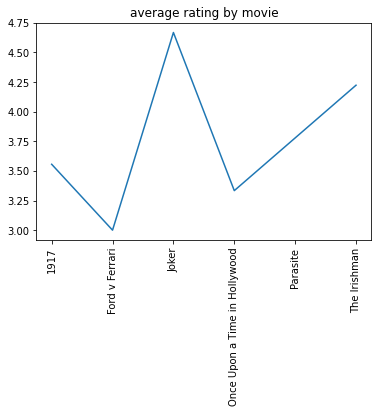

In [16]:
plt.plot(avg_rating_by_movie)
plt.title('average rating by movie')
plt.xticks(rotation = 90) # rotates x-axis ticks by 90-degrees
plt.show()

# 3. Create a new pandas dataframe, with normalized ratings for each user

According to this Towards Data Science article "[Data normalization with Pandas and Scikit-Learn](https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475#_=_)",

"*Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the leaning process. However, it does not mean those variables are more important to predict the outcome of the model. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.*"

One method of normalizing data is mix-max scaling, as shown below. All numeric variables are scaled between 0 and 1.

$x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}}$

In [17]:
# apply the min-max scaling in pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

In [18]:
# call the min_max_scaling function on the ratings by user
avg_rating_by_user_normalized = min_max_scaling(avg_rating_by_user)
avg_rating_by_user_normalized

,star_rating
user_name,
ajl,0.958333
am,0.250000
dl,0.958333
dm,0.437500
fm,0.375000
jll,1.000000
kb,0.875000
npl,0.645833
sjm,0.375000


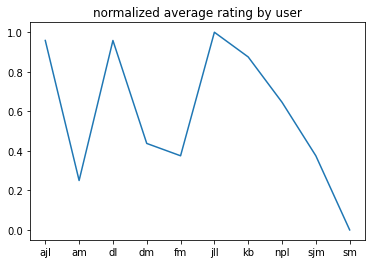

In [19]:
plt.plot(avg_rating_by_user_normalized)
plt.title('normalized average rating by user')
plt.show()

In [20]:
# call the min_max_scaling function on the ratings by movie
avg_rating_by_movie_normalized = min_max_scaling(avg_rating_by_movie)
avg_rating_by_movie_normalized

,star_rating
movie_name,
1917,0.333333
Ford v Ferrari,0.000000
Joker,1.000000
Once Upon a Time in Hollywood,0.200000
Parasite,0.466667
The Irishman,0.733333


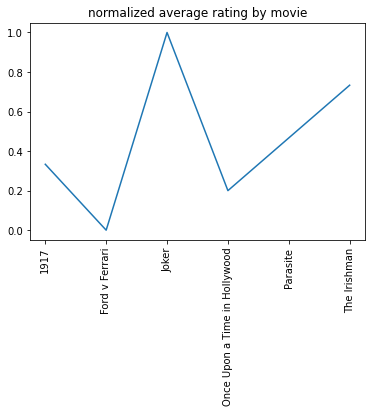

In [21]:
plt.plot(avg_rating_by_movie_normalized)
plt.title('normalized average rating by movie')
plt.xticks(rotation = 90)
plt.show()

# Provide a text-based conclusion: explain what might be advantages and disadvantages of using normalized ratings instead of the actual ratings

When comparing data or when using data to make predictions, normalization scales the data in such a way that allows for fair comparisons. As stated in the Towards Data Science article linked above, 

"*The success of a machine learning algorithm highly depends on the quality of the data fed into the model. Real-world data is often dirty containing outliers, missing values, wrong data types, irrelevant features, or non-standardized data. The presence of any of these will prevent the machine learning model to properly learn. For this reason, transforming raw data into a useful format is an essential stage in the machine learning process.*"

Normalized data does not show outliers or missing values. In cases where it might be meaningful to see those values (or lackthereof), unnormalized data might be more useful.  

# 5. [Extra credit] Create another new pandas dataframe, with standardized ratings for each user

One method of standardization data is the z-score method, as shown below.

$x_{new} = \frac{x - \mu}{\sigma}$

In [22]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [23]:
# call the z_score function on average rating by user
avg_rating_by_user_standardized = z_score(avg_rating_by_user)
avg_rating_by_user_standardized

,star_rating
user_name,
ajl,1.059224
am,-0.964013
dl,1.059224
dm,-0.428450
fm,-0.606971
jll,1.178238
kb,0.821196
npl,0.166619
sjm,-0.606971


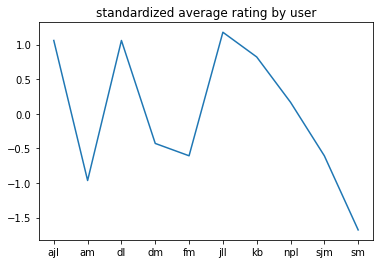

In [24]:
plt.plot(avg_rating_by_user_standardized)
plt.title('standardized average rating by user')
plt.show()

In [25]:
# call the z_score function on average rating by movie
avg_rating_by_movie_standardized = z_score(avg_rating_by_movie)
avg_rating_by_movie_standardized

,star_rating
movie_name,
1917,-0.336029
Ford v Ferrari,-1.252470
Joker,1.496855
Once Upon a Time in Hollywood,-0.702605
Parasite,0.030548
The Irishman,0.763702


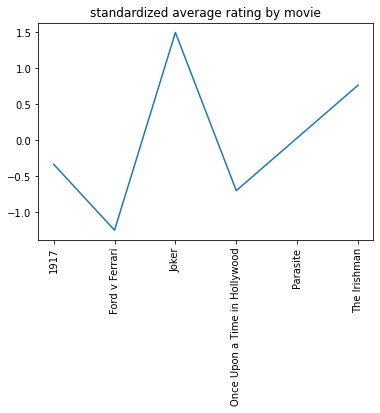

In [26]:
plt.plot(avg_rating_by_movie_standardized)
plt.title('standardized average rating by movie')
plt.xticks(rotation = 90)
plt.show()

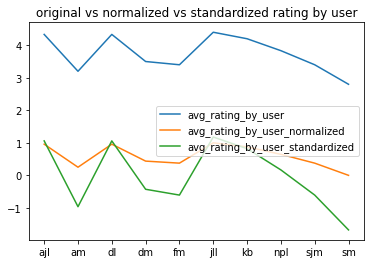

In [27]:
plt.plot(avg_rating_by_user, label = 'avg_rating_by_user')
plt.plot(avg_rating_by_user_normalized, label = 'avg_rating_by_user_normalized')
plt.plot(avg_rating_by_user_standardized, label = 'avg_rating_by_user_standardized')
plt.title('original vs normalized vs standardized rating by user')
plt.legend(loc = 'center right')
plt.show()

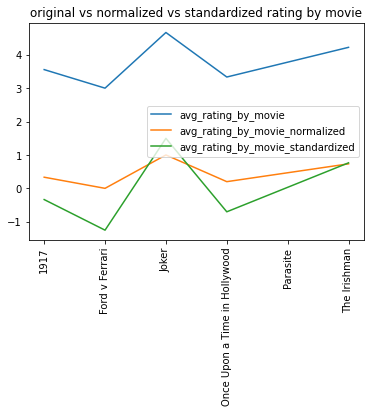

In [28]:
plt.plot(avg_rating_by_movie, label = 'avg_rating_by_movie')
plt.plot(avg_rating_by_movie_normalized, label = 'avg_rating_by_movie_normalized')
plt.plot(avg_rating_by_movie_standardized, label = 'avg_rating_by_movie_standardized')
plt.title('original vs normalized vs standardized rating by movie')
plt.legend(loc = 'center right')
plt.xticks(rotation = 90)
plt.show()